# CNN-Spectrograms-Keras-Applications-With-High-Dropout


## Imports

In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras import regularizers


import spectrograms_loader as dataset_loader
import model_runner

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
train_dataset_path = '../../spectrograms_dataset/train/'
test_dataset_path = '../../spectrograms_dataset/test/'

save_path = '../../../Results/CNN-spectrograms-high-dropout'

## Defining parameters

In [4]:
image_shape = (224, 224)
data_split_ration = 0.2
seed = 1337
batch_size = 64


epochs_n = 100
patience_n = 15
learning_rate = 0.001


input_shape = None
label_shape = None

## Model build function

In [5]:
# defining network architecture based on pretreined model
def build_model(opt, base_model, flatten = True):
    base_model.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = base_model.output
    
    if flatten is True:
        top_model = Flatten(name="flatten")(top_model)
    else:
        top_model = GlobalAveragePooling2D(name="GlobalAveragePooling2D")(top_model)
            
    top_model = Dropout(0.6)(top_model)

    top_model = Dense(512, activation='relu', name="fc1", 
                      kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                      bias_regularizer=regularizers.L2(1e-4),
                      activity_regularizer=regularizers.L2(1e-5))(top_model)
    
    top_model = Dropout(0.7)(top_model)
    
    output_layer = Dense(1, activation='sigmoid', name="prediction")(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=base_model.input, outputs=output_layer, name=base_model.name)

    # Compiles the model for training.
    model.compile(optimizer=opt, 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    print(model.summary())

    return model

## Load datasets

In [6]:
train_ds, validation_ds, test_ds = dataset_loader.load_datasets(image_shape, train_dataset_path, test_dataset_path, data_split_ration, seed, batch_size)

Found 4616 files belonging to 2 classes.
Using 3693 files for training.
Found 4616 files belonging to 2 classes.
Using 923 files for validation.
Found 1155 files belonging to 2 classes.

classes: ['SZ_negative', 'SZ_positive']

input shape: (224, 224, 3)
label shape: (1,)


In [7]:
input_shape = dataset_loader.input_shape
input_shape

TensorShape([224, 224, 3])

## MODELS

### VGG16

batch size: 64
learning rate: 0.001
epochs: 100
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool 

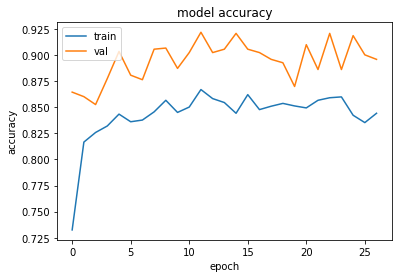

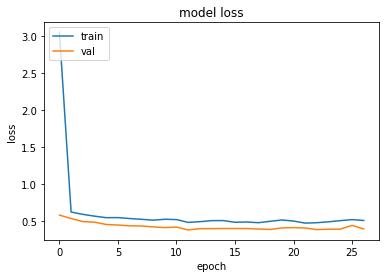

Test Accuracy: 0.9073593073593074
F1 score: 0.9110556940980881


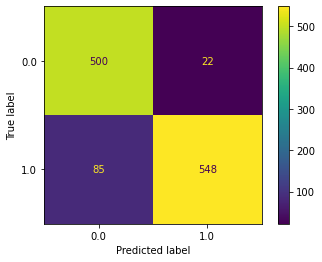

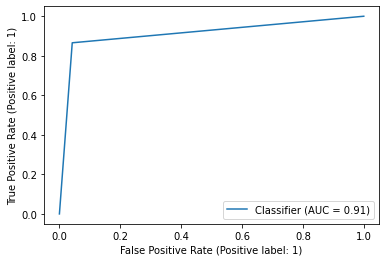

In [8]:
# batch size 64, lr 0.001, epochs 100, patience 15 
base_model = tf.keras.applications.VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)

preprocess = tf.keras.applications.vgg16.preprocess_input

model_runner.run_pretrained(train_ds, validation_ds, test_ds, input_shape, preprocess, base_model, build_model,
    flatten=True, lr = learning_rate, epochs=epochs_n, patience=patience_n, save_path=save_path)

### VGG19

batch size: 64
learning rate: 0.001
epochs: 100
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool 

58/58 [==============================] - 160s 3s/step - loss: 0.5875 - accuracy: 0.7966 - val_loss: 0.4500 - val_accuracy: 0.8472
Epoch 31/100
58/58 [==============================] - 160s 3s/step - loss: 0.6048 - accuracy: 0.7753 - val_loss: 0.4489 - val_accuracy: 0.8613
Epoch 32/100
58/58 [==============================] - 162s 3s/step - loss: 0.5833 - accuracy: 0.7972 - val_loss: 0.4850 - val_accuracy: 0.8722
Epoch 33/100
58/58 [==============================] - 162s 3s/step - loss: 0.5798 - accuracy: 0.8056 - val_loss: 0.4647 - val_accuracy: 0.8787
Epoch 34/100
58/58 [==============================] - 161s 3s/step - loss: 0.5815 - accuracy: 0.8096 - val_loss: 0.4724 - val_accuracy: 0.8960
Epoch 35/100
58/58 [==============================] - 161s 3s/step - loss: 0.5739 - accuracy: 0.8094 - val_loss: 0.4734 - val_accuracy: 0.8797
Epoch 35: early stopping


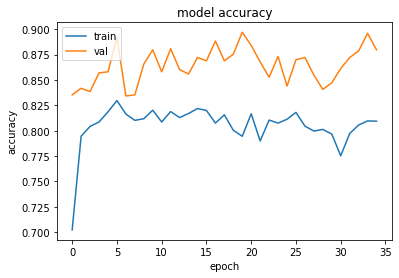

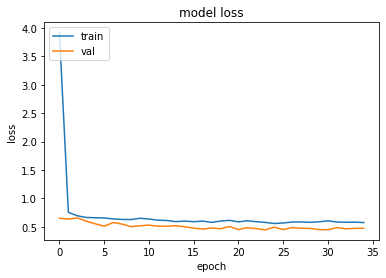

Test Accuracy: 0.8822510822510823
F1 score: 0.8855218855218855


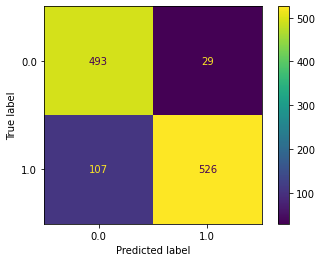

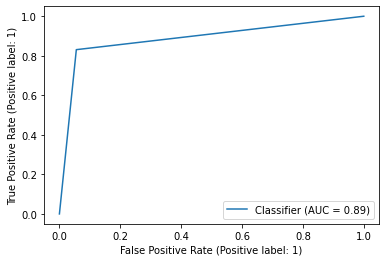

In [9]:
# batch size 64, lr 0.001, epochs 100, patience 15 
base_model = tf.keras.applications.VGG19(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)

preprocess = tf.keras.applications.vgg19.preprocess_input

model_runner.run_pretrained(train_ds, validation_ds, test_ds, input_shape, preprocess, base_model, build_model,
    flatten = True, lr = learning_rate, epochs=epochs_n, patience=patience_n, save_path=save_path)

### ResNet50V2

batch size: 64
learning rate: 0.001
epochs: 100
Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                         

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 56, 56, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_1_conv (Conv2D)   (None, 14, 14, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block1_1_relu[0][0]']    
 g2D)     

                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 14, 14, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block6_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 7, 7, 256)    589824      ['conv4_block6_2_pad[0][0]']     
          

                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 7, 7, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv5_block3_preact_relu (Acti  (None, 7, 7, 2048)  0           ['conv5_block3_preact_bn[0][0]'] 
 vation)  

58/58 [==============================] - 87s 1s/step - loss: 0.5636 - accuracy: 0.7547 - val_loss: 0.5005 - val_accuracy: 0.8494
Epoch 21/100
58/58 [==============================] - 86s 1s/step - loss: 0.5612 - accuracy: 0.7587 - val_loss: 0.4847 - val_accuracy: 0.8462
Epoch 22/100
58/58 [==============================] - 86s 1s/step - loss: 0.5581 - accuracy: 0.7547 - val_loss: 0.4873 - val_accuracy: 0.8516
Epoch 23/100
58/58 [==============================] - 90s 2s/step - loss: 0.5415 - accuracy: 0.7717 - val_loss: 0.4679 - val_accuracy: 0.8299
Epoch 24/100
58/58 [==============================] - 69s 1s/step - loss: 0.5622 - accuracy: 0.7585 - val_loss: 0.4851 - val_accuracy: 0.8505
Epoch 25/100
58/58 [==============================] - 85s 1s/step - loss: 0.5501 - accuracy: 0.7620 - val_loss: 0.4867 - val_accuracy: 0.8072
Epoch 26/100
58/58 [==============================] - 85s 1s/step - loss: 0.5474 - accuracy: 0.7566 - val_loss: 0.4856 - val_accuracy: 0.8472
Epoch 27/100
58/58 

Epoch 78/100
58/58 [==============================] - 84s 1s/step - loss: 0.5008 - accuracy: 0.7972 - val_loss: 0.4219 - val_accuracy: 0.8754
Epoch 79/100
58/58 [==============================] - 84s 1s/step - loss: 0.5056 - accuracy: 0.7931 - val_loss: 0.4406 - val_accuracy: 0.8841
Epoch 80/100
58/58 [==============================] - 84s 1s/step - loss: 0.5015 - accuracy: 0.7891 - val_loss: 0.4189 - val_accuracy: 0.8537
Epoch 81/100
58/58 [==============================] - 84s 1s/step - loss: 0.4999 - accuracy: 0.7904 - val_loss: 0.4089 - val_accuracy: 0.8808
Epoch 82/100
58/58 [==============================] - 84s 1s/step - loss: 0.5043 - accuracy: 0.7861 - val_loss: 0.4395 - val_accuracy: 0.8754
Epoch 83/100
58/58 [==============================] - 84s 1s/step - loss: 0.5067 - accuracy: 0.7926 - val_loss: 0.4340 - val_accuracy: 0.8830
Epoch 84/100
58/58 [==============================] - 84s 1s/step - loss: 0.5035 - accuracy: 0.7915 - val_loss: 0.4214 - val_accuracy: 0.8743
Epoch 

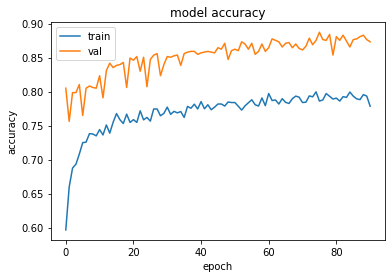

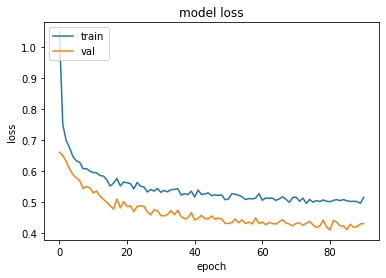

Test Accuracy: 0.8675324675324675
F1 score: 0.8706677937447169


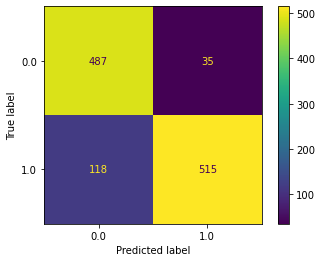

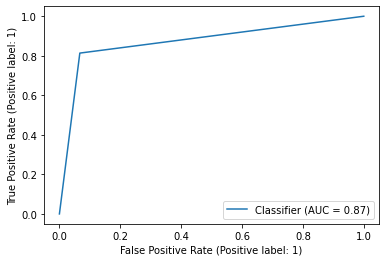

In [10]:
# batch size 64, lr 0.001, epochs 100, patience 15 
base_model = tf.keras.applications.resnet_v2.ResNet50V2(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)

preprocess = tf.keras.applications.resnet_v2.preprocess_input

model_runner.run_pretrained(train_ds, validation_ds, test_ds, input_shape, preprocess, base_model, build_model,
    flatten = False, lr = learning_rate, epochs=epochs_n, patience=patience_n, save_path=save_path)

### InceptionResNetV2

batch size: 64
learning rate: 0.001
epochs: 100
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     

                                                                                                  
 batch_normalization_5 (BatchNo  (None, 25, 25, 96)  288         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_nor

                                                                                                  
 activation_21 (Activation)     (None, 25, 25, 32)   0           ['batch_normalization_21[0][0]'] 
                                                                                                  
 conv2d_19 (Conv2D)             (None, 25, 25, 32)   10240       ['block35_1_ac[0][0]']           
                                                                                                  
 conv2d_22 (Conv2D)             (None, 25, 25, 48)   13824       ['activation_21[0][0]']          
                                                                                                  
 batch_normalization_19 (BatchN  (None, 25, 25, 32)  96          ['conv2d_19[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_nor

 ormalization)                                                                                    
                                                                                                  
 activation_24 (Activation)     (None, 25, 25, 32)   0           ['batch_normalization_24[0][0]'] 
                                                                                                  
 activation_26 (Activation)     (None, 25, 25, 32)   0           ['batch_normalization_26[0][0]'] 
                                                                                                  
 activation_29 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_29[0][0]'] 
                                                                                                  
 block35_3_mixed (Concatenate)  (None, 25, 25, 128)  0           ['activation_24[0][0]',          
                                                                  'activation_26[0][0]',          
          

 batch_normalization_37 (BatchN  (None, 25, 25, 32)  96          ['conv2d_37[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_40 (BatchN  (None, 25, 25, 48)  144         ['conv2d_40[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_37 (Activation)     (None, 25, 25, 32)   0           ['batch_normalization_37[0][0]'] 
                                                                                                  
 activation_40 (Activation)     (None, 25, 25, 48)   0           ['batch_normalization_40[0][0]'] 
                                                                                                  
 conv2d_36

                                                                                                  
 block35_6_mixed (Concatenate)  (None, 25, 25, 128)  0           ['activation_42[0][0]',          
                                                                  'activation_44[0][0]',          
                                                                  'activation_47[0][0]']          
                                                                                                  
 block35_6_conv (Conv2D)        (None, 25, 25, 320)  41280       ['block35_6_mixed[0][0]']        
                                                                                                  
 block35_6 (Lambda)             (None, 25, 25, 320)  0           ['block35_5_ac[0][0]',           
                                                                  'block35_6_conv[0][0]']         
                                                                                                  
 block35_6

                                                                                                  
 activation_58 (Activation)     (None, 25, 25, 48)   0           ['batch_normalization_58[0][0]'] 
                                                                                                  
 conv2d_54 (Conv2D)             (None, 25, 25, 32)   10240       ['block35_7_ac[0][0]']           
                                                                                                  
 conv2d_56 (Conv2D)             (None, 25, 25, 32)   9216        ['activation_55[0][0]']          
                                                                                                  
 conv2d_59 (Conv2D)             (None, 25, 25, 64)   27648       ['activation_58[0][0]']          
                                                                                                  
 batch_normalization_54 (BatchN  (None, 25, 25, 32)  96          ['conv2d_54[0][0]']              
 ormalizat

 block35_9 (Lambda)             (None, 25, 25, 320)  0           ['block35_8_ac[0][0]',           
                                                                  'block35_9_conv[0][0]']         
                                                                                                  
 block35_9_ac (Activation)      (None, 25, 25, 320)  0           ['block35_9[0][0]']              
                                                                                                  
 conv2d_69 (Conv2D)             (None, 25, 25, 32)   10240       ['block35_9_ac[0][0]']           
                                                                                                  
 batch_normalization_69 (BatchN  (None, 25, 25, 32)  96          ['conv2d_69[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 activation_75 (Activation)     (None, 12, 12, 384)  0           ['batch_normalization_75[0][0]'] 
                                                                                                  
 max_pooling2d_5 (MaxPooling2D)  (None, 12, 12, 320)  0          ['block35_10_ac[0][0]']          
                                                                                                  
 mixed_6a (Concatenate)         (None, 12, 12, 1088  0           ['activation_72[0][0]',          
                                )                                 'activation_75[0][0]',          
                                                                  'max_pooling2d_5[0][0]']        
                                                                                                  
 conv2d_77 (Conv2D)             (None, 12, 12, 128)  139264      ['mixed_6a[0][0]']               
          

 block17_2 (Lambda)             (None, 12, 12, 1088  0           ['block17_1_ac[0][0]',           
                                )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 12, 12, 1088  0           ['block17_2[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_85 (Conv2D)             (None, 12, 12, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_normalization_85 (BatchN  (None, 12, 12, 128)  384        ['conv2d_85[0][0]']              
 ormalization)                                                                                    
          

 block17_4_ac (Activation)      (None, 12, 12, 1088  0           ['block17_4[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_93 (Conv2D)             (None, 12, 12, 128)  139264      ['block17_4_ac[0][0]']           
                                                                                                  
 batch_normalization_93 (BatchN  (None, 12, 12, 128)  384        ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_93 (Activation)     (None, 12, 12, 128)  0           ['batch_normalization_93[0][0]'] 
                                                                                                  
 conv2d_94

 conv2d_101 (Conv2D)            (None, 12, 12, 128)  139264      ['block17_6_ac[0][0]']           
                                                                                                  
 batch_normalization_101 (Batch  (None, 12, 12, 128)  384        ['conv2d_101[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_101 (Activation)    (None, 12, 12, 128)  0           ['batch_normalization_101[0][0]']
                                                                                                  
 conv2d_102 (Conv2D)            (None, 12, 12, 160)  143360      ['activation_101[0][0]']         
                                                                                                  
 batch_normalization_102 (Batch  (None, 12, 12, 160)  480        ['conv2d_102[0][0]']             
 Normaliza

 Normalization)                                                                                   
                                                                                                  
 activation_109 (Activation)    (None, 12, 12, 128)  0           ['batch_normalization_109[0][0]']
                                                                                                  
 conv2d_110 (Conv2D)            (None, 12, 12, 160)  143360      ['activation_109[0][0]']         
                                                                                                  
 batch_normalization_110 (Batch  (None, 12, 12, 160)  480        ['conv2d_110[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_110 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_110[0][0]']
          

                                                                                                  
 conv2d_118 (Conv2D)            (None, 12, 12, 160)  143360      ['activation_117[0][0]']         
                                                                                                  
 batch_normalization_118 (Batch  (None, 12, 12, 160)  480        ['conv2d_118[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_118 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_118[0][0]']
                                                                                                  
 conv2d_116 (Conv2D)            (None, 12, 12, 192)  208896      ['block17_10_ac[0][0]']          
                                                                                                  
 conv2d_11

 batch_normalization_126 (Batch  (None, 12, 12, 160)  480        ['conv2d_126[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_126 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_126[0][0]']
                                                                                                  
 conv2d_124 (Conv2D)            (None, 12, 12, 192)  208896      ['block17_12_ac[0][0]']          
                                                                                                  
 conv2d_127 (Conv2D)            (None, 12, 12, 192)  215040      ['activation_126[0][0]']         
                                                                                                  
 batch_normalization_124 (Batch  (None, 12, 12, 192)  576        ['conv2d_124[0][0]']             
 Normaliza

 activation_134 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_134[0][0]']
                                                                                                  
 conv2d_132 (Conv2D)            (None, 12, 12, 192)  208896      ['block17_14_ac[0][0]']          
                                                                                                  
 conv2d_135 (Conv2D)            (None, 12, 12, 192)  215040      ['activation_134[0][0]']         
                                                                                                  
 batch_normalization_132 (Batch  (None, 12, 12, 192)  576        ['conv2d_132[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_135 (Batch  (None, 12, 12, 192)  576        ['conv2d_135[0][0]']             
 Normaliza

                                                                                                  
 conv2d_143 (Conv2D)            (None, 12, 12, 192)  215040      ['activation_142[0][0]']         
                                                                                                  
 batch_normalization_140 (Batch  (None, 12, 12, 192)  576        ['conv2d_140[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_143 (Batch  (None, 12, 12, 192)  576        ['conv2d_143[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_140 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_140[0][0]']
          

 batch_normalization_148 (Batch  (None, 12, 12, 192)  576        ['conv2d_148[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_151 (Batch  (None, 12, 12, 192)  576        ['conv2d_151[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_148[0][0]']
                                                                                                  
 activation_151 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_151[0][0]']
                                                                                                  
 block17_1

                                                                                                  
 activation_156 (Activation)    (None, 12, 12, 256)  0           ['batch_normalization_156[0][0]']
                                                                                                  
 activation_158 (Activation)    (None, 12, 12, 256)  0           ['batch_normalization_158[0][0]']
                                                                                                  
 activation_161 (Activation)    (None, 12, 12, 288)  0           ['batch_normalization_161[0][0]']
                                                                                                  
 conv2d_157 (Conv2D)            (None, 5, 5, 384)    884736      ['activation_156[0][0]']         
                                                                                                  
 conv2d_159 (Conv2D)            (None, 5, 5, 288)    663552      ['activation_158[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_169 (Activation)    (None, 5, 5, 224)    0           ['batch_normalization_169[0][0]']
                                                                                                  
 conv2d_167 (Conv2D)            (None, 5, 5, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_170 (Conv2D)            (None, 5, 5, 256)    172032      ['activation_169[0][0]']         
                                                                                                  
 batch_normalization_167 (Batch  (None, 5, 5, 192)   576         ['conv2d_167[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 batch_normalization_175 (Batch  (None, 5, 5, 192)   576         ['conv2d_175[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_178 (Batch  (None, 5, 5, 256)   768         ['conv2d_178[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_175 (Activation)    (None, 5, 5, 192)    0           ['batch_normalization_175[0][0]']
                                                                                                  
 activation_178 (Activation)    (None, 5, 5, 256)    0           ['batch_normalization_178[0][0]']
          

 activation_183 (Activation)    (None, 5, 5, 192)    0           ['batch_normalization_183[0][0]']
                                                                                                  
 activation_186 (Activation)    (None, 5, 5, 256)    0           ['batch_normalization_186[0][0]']
                                                                                                  
 block8_6_mixed (Concatenate)   (None, 5, 5, 448)    0           ['activation_183[0][0]',         
                                                                  'activation_186[0][0]']         
                                                                                                  
 block8_6_conv (Conv2D)         (None, 5, 5, 2080)   933920      ['block8_6_mixed[0][0]']         
                                                                                                  
 block8_6 (Lambda)              (None, 5, 5, 2080)   0           ['block8_5_ac[0][0]',            
          

 block8_8_conv (Conv2D)         (None, 5, 5, 2080)   933920      ['block8_8_mixed[0][0]']         
                                                                                                  
 block8_8 (Lambda)              (None, 5, 5, 2080)   0           ['block8_7_ac[0][0]',            
                                                                  'block8_8_conv[0][0]']          
                                                                                                  
 block8_8_ac (Activation)       (None, 5, 5, 2080)   0           ['block8_8[0][0]']               
                                                                                                  
 conv2d_196 (Conv2D)            (None, 5, 5, 192)    399360      ['block8_8_ac[0][0]']            
                                                                                                  
 batch_normalization_196 (Batch  (None, 5, 5, 192)   576         ['conv2d_196[0][0]']             
 Normaliza

 conv_7b_bn (BatchNormalization  (None, 5, 5, 1536)  4608        ['conv_7b[0][0]']                
 )                                                                                                
                                                                                                  
 conv_7b_ac (Activation)        (None, 5, 5, 1536)   0           ['conv_7b_bn[0][0]']             
                                                                                                  
 GlobalAveragePooling2D (Global  (None, 1536)        0           ['conv_7b_ac[0][0]']             
 AveragePooling2D)                                                                                
                                                                                                  
 dropout_6 (Dropout)            (None, 1536)         0           ['GlobalAveragePooling2D[0][0]'] 
                                                                                                  
 fc1 (Dens

58/58 [==============================] - 187s 3s/step - loss: 0.5329 - accuracy: 0.7907 - val_loss: 0.4837 - val_accuracy: 0.8245
Epoch 46/100
58/58 [==============================] - 187s 3s/step - loss: 0.5245 - accuracy: 0.7953 - val_loss: 0.4588 - val_accuracy: 0.8375
Epoch 47/100
58/58 [==============================] - 187s 3s/step - loss: 0.5283 - accuracy: 0.7812 - val_loss: 0.4670 - val_accuracy: 0.8288
Epoch 48/100
58/58 [==============================] - 188s 3s/step - loss: 0.5219 - accuracy: 0.7888 - val_loss: 0.4700 - val_accuracy: 0.8342
Epoch 48: early stopping


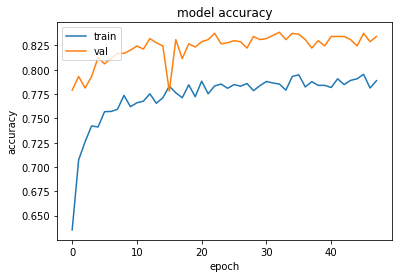

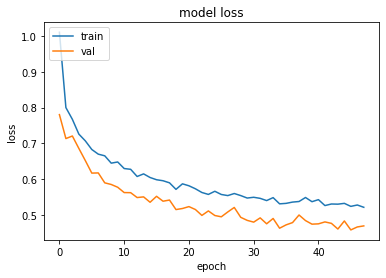

Test Accuracy: 0.8233766233766234
F1 score: 0.8247422680412371


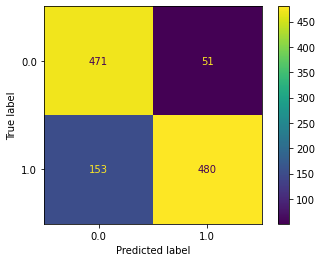

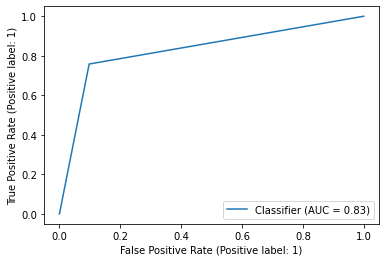

In [11]:
# batch size 64, lr 0.001, epochs 100, patience 15 
base_model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)

preprocess = tf.keras.applications.inception_resnet_v2.preprocess_input

model_runner.run_pretrained(train_ds, validation_ds, test_ds, input_shape, preprocess, base_model, build_model,
    flatten = False, lr = learning_rate, epochs=epochs_n, patience=patience_n, save_path=save_path)

### MobileNetV2

batch size: 64
learning rate: 0.001
epochs: 100
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                               

                                                                                                  
 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
          

 block_6_project_BN (BatchNorma  (None, 14, 14, 64)  256         ['block_6_project[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_d

 rmalization)                                                                                     
                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
          

                                                                                                  
 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
          

Epoch 3/100
58/58 [==============================] - 42s 719ms/step - loss: 0.6499 - accuracy: 0.7441 - val_loss: 0.5754 - val_accuracy: 0.7985
Epoch 4/100
58/58 [==============================] - 42s 719ms/step - loss: 0.6435 - accuracy: 0.7376 - val_loss: 0.5572 - val_accuracy: 0.8072
Epoch 5/100
58/58 [==============================] - 42s 722ms/step - loss: 0.6192 - accuracy: 0.7460 - val_loss: 0.5447 - val_accuracy: 0.8418
Epoch 6/100
58/58 [==============================] - 42s 719ms/step - loss: 0.6009 - accuracy: 0.7520 - val_loss: 0.5203 - val_accuracy: 0.8212
Epoch 7/100
58/58 [==============================] - 42s 718ms/step - loss: 0.5919 - accuracy: 0.7625 - val_loss: 0.5135 - val_accuracy: 0.8277
Epoch 8/100
58/58 [==============================] - 42s 718ms/step - loss: 0.5836 - accuracy: 0.7655 - val_loss: 0.5082 - val_accuracy: 0.8342
Epoch 9/100
58/58 [==============================] - 42s 719ms/step - loss: 0.5705 - accuracy: 0.7801 - val_loss: 0.5082 - val_accuracy:

58/58 [==============================] - 42s 720ms/step - loss: 0.4659 - accuracy: 0.8029 - val_loss: 0.4001 - val_accuracy: 0.8559
Epoch 60/100
58/58 [==============================] - 42s 719ms/step - loss: 0.4765 - accuracy: 0.8048 - val_loss: 0.4022 - val_accuracy: 0.8657
Epoch 61/100
58/58 [==============================] - 42s 719ms/step - loss: 0.4664 - accuracy: 0.8105 - val_loss: 0.3939 - val_accuracy: 0.8570
Epoch 62/100
58/58 [==============================] - 42s 719ms/step - loss: 0.4700 - accuracy: 0.8080 - val_loss: 0.3947 - val_accuracy: 0.8613
Epoch 63/100
58/58 [==============================] - 42s 720ms/step - loss: 0.4632 - accuracy: 0.8012 - val_loss: 0.4100 - val_accuracy: 0.8353
Epoch 64/100
58/58 [==============================] - 42s 722ms/step - loss: 0.4709 - accuracy: 0.8050 - val_loss: 0.3983 - val_accuracy: 0.8505
Epoch 64: early stopping


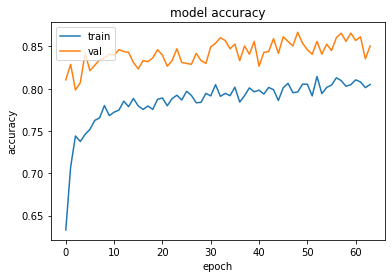

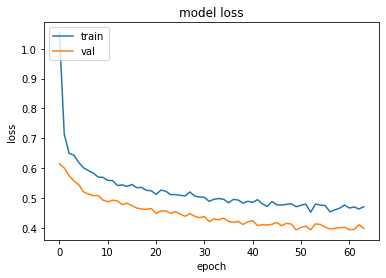

Test Accuracy: 0.858008658008658
F1 score: 0.856893542757417


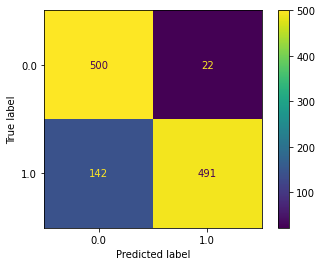

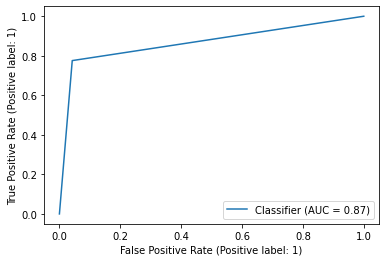

In [12]:
# batch size 64, lr 0.001, epochs 100, patience 15 
base_model = tf.keras.applications.MobileNetV2(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)

preprocess = tf.keras.applications.mobilenet_v2.preprocess_input

model_runner.run_pretrained(train_ds, validation_ds, test_ds, input_shape, preprocess, base_model, build_model,
    flatten = False, lr = learning_rate, epochs=epochs_n, patience=patience_n, save_path=save_path)

### DenseNet169

batch size: 64
learning rate: 0.001
epochs: 100
Model: "densenet169"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_7[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_2[0][0]']       
                                )       

 conv2_block4_0_relu (Activatio  (None, 56, 56, 160)  0          ['conv2_block4_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_1_conv (Conv2D)   (None, 56, 56, 128)  20480       ['conv2_block4_0_relu[0][0]']    
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 56, 56, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 56, 56, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block2_0_relu (Activatio  (None, 28, 28, 160)  0          ['conv3_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 28, 28, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)       

 ization)                                                                                         
                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 28, 28, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 28, 28, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_blo

 conv3_block10_concat (Concaten  (None, 28, 28, 448)  0          ['conv3_block9_concat[0][0]',    
 ate)                                                             'conv3_block10_2_conv[0][0]']   
                                                                                                  
 conv3_block11_0_bn (BatchNorma  (None, 28, 28, 448)  1792       ['conv3_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 28, 28, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 28, 28, 128)  57344       ['conv3_block11_0_relu[0][0]']   
          

                                                                                                  
 conv4_block2_concat (Concatena  (None, 14, 14, 320)  0          ['conv4_block1_concat[0][0]',    
 te)                                                              'conv4_block2_2_conv[0][0]']    
                                                                                                  
 conv4_block3_0_bn (BatchNormal  (None, 14, 14, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 14, 14, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block7_0_relu (Activatio  (None, 14, 14, 448)  0          ['conv4_block7_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_1_conv (Conv2D)   (None, 14, 14, 128)  57344       ['conv4_block7_0_relu[0][0]']    
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 14, 14, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 14, 14, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv4_block11_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 14, 14, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 14, 14, 608)  2432       ['conv4_block11_concat[0][0]']   
 lization)

 ate)                                                             'conv4_block15_2_conv[0][0]']   
                                                                                                  
 conv4_block16_0_bn (BatchNorma  (None, 14, 14, 736)  2944       ['conv4_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_0_relu (Activati  (None, 14, 14, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 14, 14, 128)  94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block20_1_conv (Conv2D)  (None, 14, 14, 128)  110592      ['conv4_block20_0_relu[0][0]']   
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block20_1_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_concat (Concaten  (None, 14, 14, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 conv4_block25_0_bn (BatchNorma  (None, 14, 14, 1024  4096       ['conv4_block24_concat[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_blo

 conv4_block29_0_bn (BatchNorma  (None, 14, 14, 1152  4608       ['conv4_block28_concat[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block29_0_relu (Activati  (None, 14, 14, 1152  0          ['conv4_block29_0_bn[0][0]']     
 on)                            )                                                                 
                                                                                                  
 conv4_block29_1_conv (Conv2D)  (None, 14, 14, 128)  147456      ['conv4_block29_0_relu[0][0]']   
                                                                                                  
 conv4_block29_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block29_1_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 pool4_pool (AveragePooling2D)  (None, 7, 7, 640)    0           ['pool4_conv[0][0]']             
                                                                                                  
 conv5_block1_0_bn (BatchNormal  (None, 7, 7, 640)   2560        ['pool4_pool[0][0]']             
 ization)                                                                                         
                                                                                                  
 conv5_block1_0_relu (Activatio  (None, 7, 7, 640)   0           ['conv5_block1_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block1_1_conv (Conv2D)   (None, 7, 7, 128)    81920       ['conv5_block1_0_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv5_block5_1_conv (Conv2D)   (None, 7, 7, 128)    98304       ['conv5_block5_0_relu[0][0]']    
                                                                                                  
 conv5_block5_1_bn (BatchNormal  (None, 7, 7, 128)   512         ['conv5_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block5_1_relu (Activatio  (None, 7, 7, 128)   0           ['conv5_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_blo

 conv5_block9_1_relu (Activatio  (None, 7, 7, 128)   0           ['conv5_block9_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block9_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv5_block9_1_relu[0][0]']    
                                                                                                  
 conv5_block9_concat (Concatena  (None, 7, 7, 928)   0           ['conv5_block8_concat[0][0]',    
 te)                                                              'conv5_block9_2_conv[0][0]']    
                                                                                                  
 conv5_block10_0_bn (BatchNorma  (None, 7, 7, 928)   3712        ['conv5_block9_concat[0][0]']    
 lization)                                                                                        
          

                                                                                                  
 conv5_block14_0_bn (BatchNorma  (None, 7, 7, 1056)  4224        ['conv5_block13_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block14_0_relu (Activati  (None, 7, 7, 1056)  0           ['conv5_block14_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block14_1_conv (Conv2D)  (None, 7, 7, 128)    135168      ['conv5_block14_0_relu[0][0]']   
                                                                                                  
 conv5_block14_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block14_1_conv[0][0]']   
 lization)

 conv5_block18_1_conv (Conv2D)  (None, 7, 7, 128)    151552      ['conv5_block18_0_relu[0][0]']   
                                                                                                  
 conv5_block18_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block18_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block18_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block18_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block18_2_conv (Conv2D)  (None, 7, 7, 32)     36864       ['conv5_block18_1_relu[0][0]']   
                                                                                                  
 conv5_blo

                                                                                                  
 conv5_block22_2_conv (Conv2D)  (None, 7, 7, 32)     36864       ['conv5_block22_1_relu[0][0]']   
                                                                                                  
 conv5_block22_concat (Concaten  (None, 7, 7, 1344)  0           ['conv5_block21_concat[0][0]',   
 ate)                                                             'conv5_block22_2_conv[0][0]']   
                                                                                                  
 conv5_block23_0_bn (BatchNorma  (None, 7, 7, 1344)  5376        ['conv5_block22_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block23_0_relu (Activati  (None, 7, 7, 1344)  0           ['conv5_block23_0_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv5_block27_0_relu (Activati  (None, 7, 7, 1472)  0           ['conv5_block27_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block27_1_conv (Conv2D)  (None, 7, 7, 128)    188416      ['conv5_block27_0_relu[0][0]']   
                                                                                                  
 conv5_block27_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block27_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_blo

 conv5_block31_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block31_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block31_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block31_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block31_2_conv (Conv2D)  (None, 7, 7, 32)     36864       ['conv5_block31_1_relu[0][0]']   
                                                                                                  
 conv5_block31_concat (Concaten  (None, 7, 7, 1632)  0           ['conv5_block30_concat[0][0]',   
 ate)                                                             'conv5_block31_2_conv[0][0]']   
          

58/58 [==============================] - 120s 2s/step - loss: 0.4516 - accuracy: 0.8289 - val_loss: 0.3828 - val_accuracy: 0.8613
Epoch 26/100
58/58 [==============================] - 120s 2s/step - loss: 0.4569 - accuracy: 0.8153 - val_loss: 0.3963 - val_accuracy: 0.8700
Epoch 27/100
58/58 [==============================] - 120s 2s/step - loss: 0.4642 - accuracy: 0.8172 - val_loss: 0.3919 - val_accuracy: 0.8624
Epoch 28/100
58/58 [==============================] - 120s 2s/step - loss: 0.4519 - accuracy: 0.8321 - val_loss: 0.3906 - val_accuracy: 0.8624
Epoch 29/100
58/58 [==============================] - 120s 2s/step - loss: 0.4481 - accuracy: 0.8221 - val_loss: 0.3943 - val_accuracy: 0.8613
Epoch 30/100
58/58 [==============================] - 120s 2s/step - loss: 0.4585 - accuracy: 0.8232 - val_loss: 0.3952 - val_accuracy: 0.8613
Epoch 31/100
58/58 [==============================] - 120s 2s/step - loss: 0.4434 - accuracy: 0.8283 - val_loss: 0.3852 - val_accuracy: 0.8711
Epoch 32/100

58/58 [==============================] - 121s 2s/step - loss: 0.4148 - accuracy: 0.8340 - val_loss: 0.3550 - val_accuracy: 0.8830
Epoch 83/100
58/58 [==============================] - 121s 2s/step - loss: 0.4186 - accuracy: 0.8408 - val_loss: 0.3439 - val_accuracy: 0.8938
Epoch 84/100
58/58 [==============================] - 121s 2s/step - loss: 0.4111 - accuracy: 0.8432 - val_loss: 0.3440 - val_accuracy: 0.8906
Epoch 84: early stopping


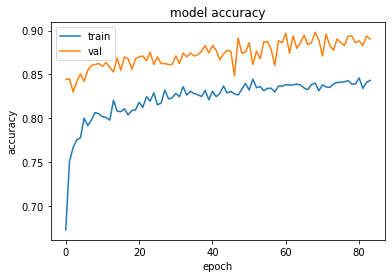

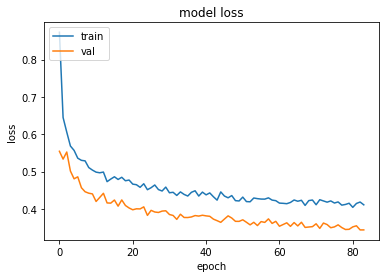

Test Accuracy: 0.883982683982684
F1 score: 0.8848797250859106


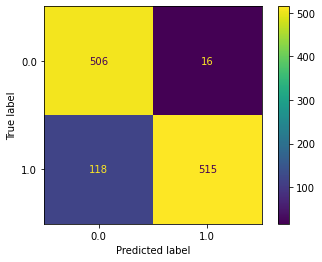

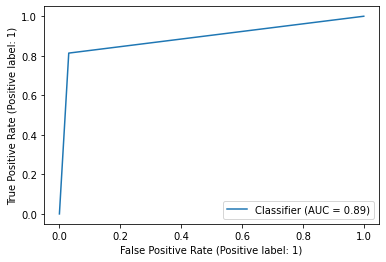

In [14]:
# batch size 64, lr 0.001, epochs 100, patience 15 
base_model = tf.keras.applications.DenseNet169(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)

preprocess = tf.keras.applications.densenet.preprocess_input

model_runner.run_pretrained(train_ds, validation_ds, test_ds, input_shape, preprocess, base_model, build_model,
    flatten = False, lr = learning_rate, epochs=epochs_n, patience=patience_n, save_path=save_path)

### EfficientNetB2

In [ ]:
# batch size 64, lr 0.001, epochs 100, patience 15 
base_model = tf.keras.applications.EfficientNetB2(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)

preprocess = tf.keras.applications.efficientnet.preprocess_input

model_runner.run_pretrained(train_ds, validation_ds, test_ds, input_shape, preprocess, base_model, build_model,
    flatten = False, lr = learning_rate, epochs=epochs_n, patience=patience_n, save_path=save_path)

### Xception

In [ ]:
# batch size 64, lr 0.001, epochs 100, patience 15 
base_model = tf.keras.applications.Xception(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)

preprocess = tf.keras.applications.xception.preprocess_input

model_runner.run_pretrained(train_ds, validation_ds, test_ds, input_shape, preprocess, base_model, build_model,
    flatten = False, lr = learning_rate, epochs=epochs_n, patience=patience_n, save_path=save_path)

In [ ]:
# batch size 64, lr 0.001, epochs 100, patience 15 
base_model = tf.keras.applications.nasnet.NASNetMobile(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)

preprocess = tf.keras.applications.nasnet.preprocess_input

model_runner.run_pretrained(train_ds, validation_ds, test_ds, input_shape, preprocess, base_model, build_model,
    flatten = False, lr = learning_rate, epochs=epochs_n, patience=patience_n, save_path=save_path)